# Assignment 1B - Question 1
## Training and Adapting Deep Networks

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.io import loadmat

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorboard import notebook
from tensorflow.keras.preprocessing.image import Iterator

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Load data from training and testing sets

Use scipy.io loadmat function

In [2]:
train = loadmat('Data/Q1/q1_train.mat')
test = loadmat('Data/Q1/q1_test.mat')

### Sanity check

In [14]:
train['train_Y'].shape

(1000, 1)

In [13]:
test['test_Y'].shape

(10000, 1)

In [15]:
train['train_X']

array([[[[ 74, 148, 118, ...,  47, 206, 126],
         [ 65, 144, 123, ...,  44, 198,  76],
         [ 55, 145, 127, ...,  53, 222,  49]],

        [[ 75, 147, 118, ...,  51, 193, 118],
         [ 67, 143, 123, ...,  44, 187,  68],
         [ 57, 144, 127, ...,  52, 211,  43]],

        [[ 77, 144, 118, ...,  54, 185, 110],
         [ 70, 139, 123, ...,  42, 179,  61],
         [ 60, 143, 127, ...,  52, 205,  37]],

        ...,

        [[ 25, 143, 116, ...,  99, 212, 114],
         [ 24, 133, 121, ...,  63, 212,  63],
         [ 22, 134, 124, ...,  49, 249,  34]],

        [[ 28, 143, 119, ..., 104, 212, 111],
         [ 27, 133, 124, ...,  72, 216,  60],
         [ 25, 132, 127, ...,  57, 252,  31]],

        [[ 29, 143, 121, ..., 102, 214, 109],
         [ 28, 133, 125, ...,  73, 218,  58],
         [ 26, 132, 128, ...,  59, 254,  27]]],


       [[[ 64, 151, 115, ...,  47, 248, 128],
         [ 55, 145, 120, ...,  44, 244,  82],
         [ 47, 147, 124, ...,  55, 251,  55]],

    

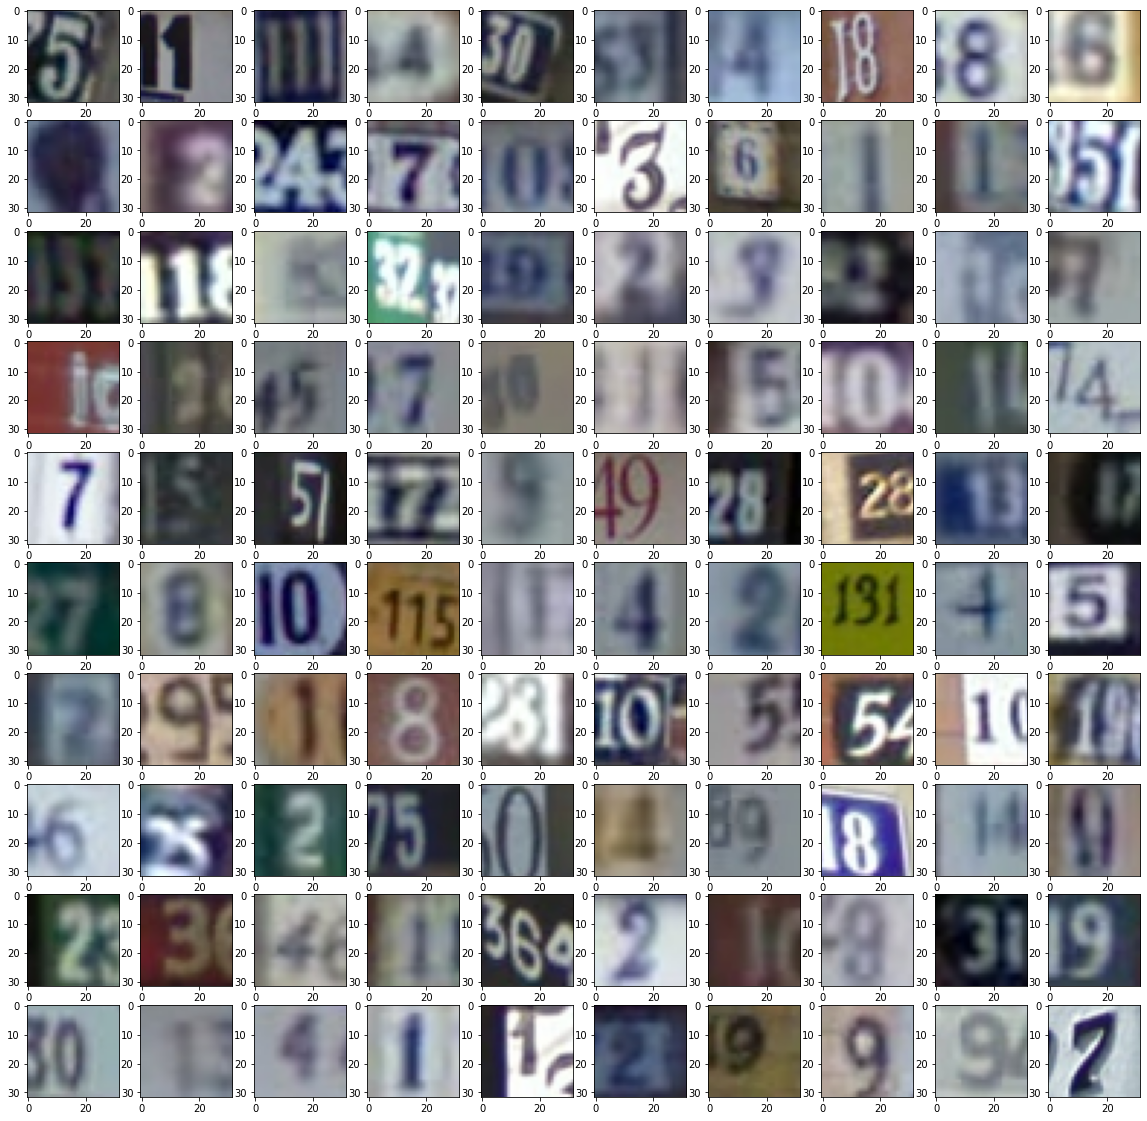

In [6]:
(x_test, y_test) = (test['test_X'], test['test_Y'])
x_test = x_test.astype('float32') / 255
fig = plt.figure(figsize=[20, 20])
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(x_test[:,:,:,i])

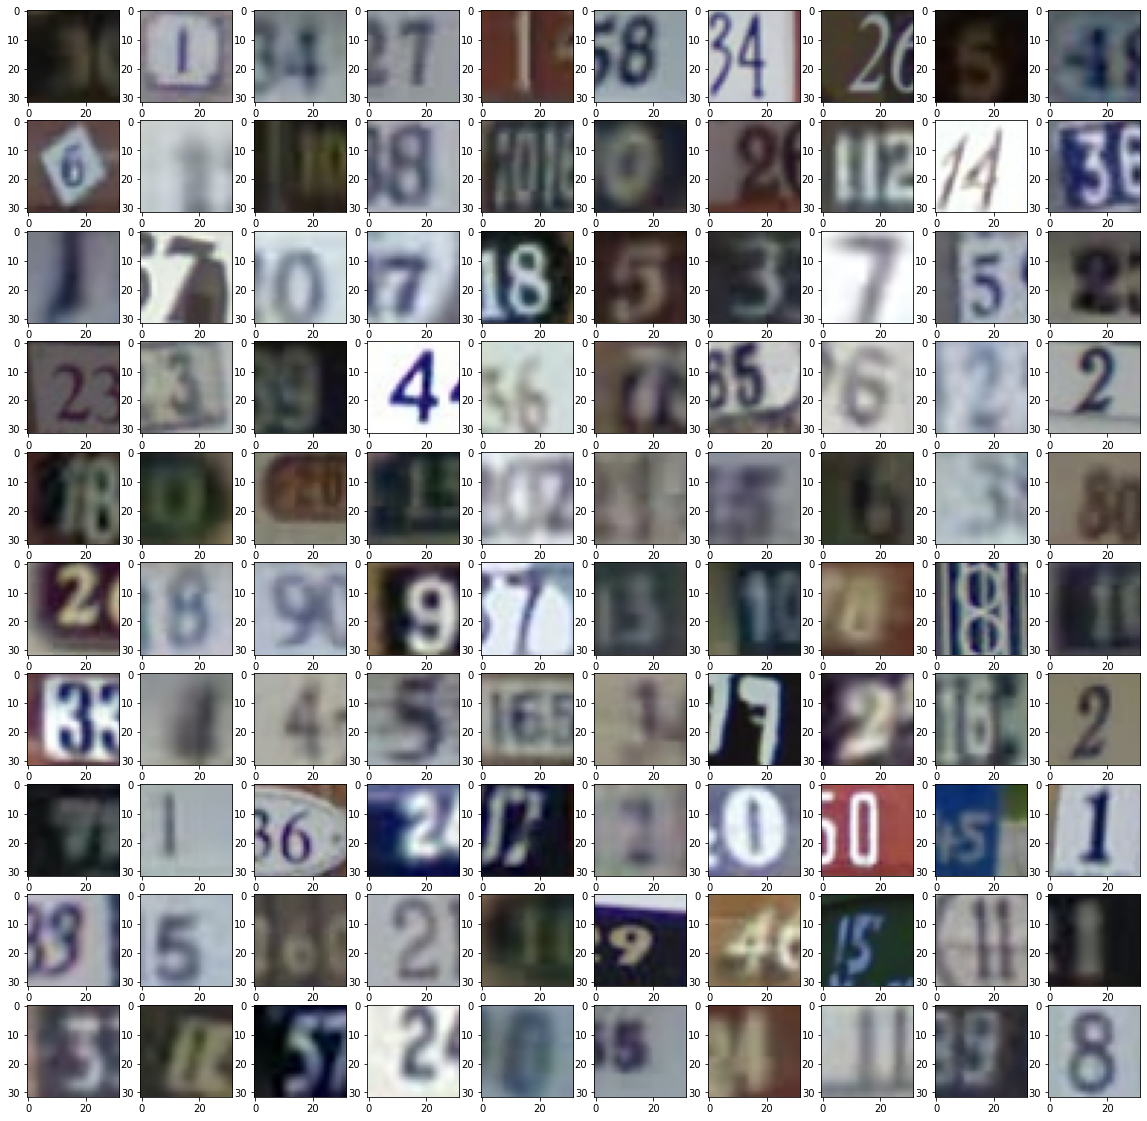

In [7]:
(x_train, y_train) = (train['train_X'], train['train_Y'])
x_train = x_train.astype('float32') / 255
fig = plt.figure(figsize=[20, 20])
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(x_train[:,:,:,i])

### Keras Model

Taken from Week 4 example 3

In [8]:
# input layer, 28x28x1 images
inputs = keras.Input(shape=(28, 28, 1, ), name='img')
# 3 conv layers, with increasing numbers of filters, and a max-pool in the middle of each pair of Conv's
x = layers.Conv2D(filters=8, kernel_size=(3,3), activation='swish')(inputs)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='swish')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='swish')(x)
# flatten into a vector form so we can pass it through a dense layer
x = layers.Flatten()(x)
# dense layer
x = layers.Dense(64, activation='swish')(x)
# output layer, single value, as we only have 1 output - the 
outputs = layers.Dense(1)(x)

# build the model and print a summary
model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='mnist_angles_cnn_model')
model_cnn.summary()

Model: "mnist_angles_cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          4640      
_________________________________________________________________
flatten (Flatten)            (None, 288)    

In [10]:
x_train.shape

(32, 32, 3, 1000)

In [11]:
y_train.shape

(1000, 1)

In [9]:
# train the model
model_cnn.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.RMSprop())

history = model_cnn.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_data=(x_test, y_test))

ValueError: Data cardinality is ambiguous:
  x sizes: 32
  y sizes: 1000
Make sure all arrays contain the same number of samples.